In [1]:
import sys
sys.path.append('../src')
# Import necessary modules
from eda import EDA
import pandas as pd
from visualizations import SalesVisualizer

In [2]:

# Initialize EDA class
eda = EDA(train_path='../data/raw/train.csv', store_path='../data/raw/store.csv' )


In [3]:
# Load and merge datasets
merged_df = eda.load_and_merge_data()
print("Data merged successfully.")

2025-01-03 20:58:05,600 - EDA - INFO - Loading train and store datasets...
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\eda.py:19: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(self.train_path)
2025-01-03 20:58:06,520 - EDA - INFO - Datasets loaded successfully. Merging them...
2025-01-03 20:58:06,693 - EDA - INFO - Datasets merged successfully.


Data merged successfully.


Loaded and merged our train data and store data to perform Data exploration

In [5]:
# Explore Data
head, info, stats = eda.explore_data()

2025-01-03 14:01:03,826 - EDA - INFO - Exploring dataset...
2025-01-03 14:01:03,833 - EDA - INFO - First 5 Rows:
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  Competiti

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

2025-01-03 14:01:04,861 - EDA - INFO - Basic Statistics:
              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.014567e+06   
mean   3.815145e-01   1.786467e-01         5.430086e+03   
std    4.857586e-01   3.830564e-01         7.715324e+0

### Data Exploration
In this step, we explored the dataset by checking its basic properties and summarizing the key statistics:

1. **First 5 Rows**:
   - Displayed the first 5 rows to get an initial view of the dataset's structure and the type of data it holds.
   
2. **Data Information**:
   - Provided an overview of the dataset, including the number of entries (1,017,209) and columns (18).
   - Listed the column names, data types, and the number of non-null values in each column.
   - Notably, some columns like `CompetitionDistance`, `CompetitionOpenSinceMonth`, and `Promo2SinceWeek` contain missing values.

3. **Basic Statistics**:
   - Displayed summary statistics for numerical columns, including mean, standard deviation, min, max, and quartiles.
   - For instance, `Sales` has a mean of 5,773.8 with a max value of 41,551, while `CompetitionDistance` has a mean of 5,430.1 with a large range.


In [7]:
# Check Missing Values
missing_values_df = eda.check_missing_values()

2025-01-03 14:23:12,603 - EDA - INFO - Checking for missing values in the dataset...
2025-01-03 14:23:12,978 - EDA - INFO - Missing values calculated successfully.
2025-01-03 14:23:12,989 - EDA - INFO - Missing Values Summary:
                           Missing Values  Percentage
Promo2SinceWeek                    508031   49.943620
PromoInterval                      508031   49.943620
Promo2SinceYear                    508031   49.943620
CompetitionOpenSinceYear           323348   31.787764
CompetitionOpenSinceMonth          323348   31.787764
CompetitionDistance                  2642    0.259730


### Missing Data
Next, we focused on checking and understanding the missing data in the dataset:

1. **Checking for Missing Values**:
   - We identified that some columns have missing values, specifically `Promo2SinceWeek`, `PromoInterval`, `Promo2SinceYear`, and others.
   
2. **Missing Values Summary**:
   - A summary was provided listing the columns with missing values along with the number of missing entries and the percentage of missing data.
   - Key columns with missing data include:
     - `Promo2SinceWeek`, `PromoInterval`, and `Promo2SinceYear` (all have around 50% missing values).
     - `CompetitionOpenSinceYear` and `CompetitionOpenSinceMonth` (approximately 31.7% missing values).
     - `CompetitionDistance` (only a small fraction of missing values—0.26%).

### Conclusion and Next Steps

**Conclusion**:
- The dataset contains a significant amount of missing values, particularly in the columns related to promotions (`Promo2SinceWeek`, `PromoInterval`, `Promo2SinceYear`), and competition-related features (`CompetitionOpenSinceYear`, `CompetitionOpenSinceMonth`).
- While some columns, like `CompetitionDistance`, have minimal missing data, others, like `PromoInterval` and `Promo2SinceWeek`, have a considerable percentage of missing values (~50%).

**Next Steps**
1. **Clean data**
2. **Detect outliners**
3. **Handle outliners using appropraite methods**

In [4]:
# Process and clean the data
cleaned_df = eda.process_and_clean_data()
print("Data cleaned successfully.")

2025-01-03 20:58:11,713 - EDA - INFO - Processing and cleaning data: Handling missing values, converting data types, and checking for negative values...
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\eda.py:91: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(self.df[column].median(), inplace=True)
2025-01-03 20:58:11,853 - EDA - INFO - Missing values in 'CompetitionDistance' filled with median value.
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\eda.py:91: FutureWarning: A value is

Data cleaned successfully.


In [5]:
# Check for missing values after cleaning
missing_values_after_cleaning = eda.df.isnull().sum()

# Display missing values summary
print("Missing Values After Cleaning:")
print(missing_values_after_cleaning)


Missing Values After Cleaning:
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


### Data Cleaning and Missing Values Handling

In this step, we handled the missing values in the dataset by performing the following actions:

1. **Categorical Columns**:
   - Missing values in categorical columns were filled with the string `'Unknown'`.

2. **Numerical Columns**:
   - Missing values in numerical columns were filled with the **median** value of the respective column.

3. **Data Type Conversion**:
   - Certain columns were explicitly converted to appropriate data types:
     - `StateHoliday`, `StoreType`, `Assortment`, `PromoInterval` were converted to **category** type.
     - `Date` was converted to **datetime** type.
     - `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` were converted to **Int64** type.

4. **Handling Negative Values**:
   - Negative values in numerical columns were identified and replaced with **0**.

After these transformations, the dataset has been cleaned, and the missing values handled correctly.


In [5]:
# Handle outliers in the cleaned dataset
cleaned_df = eda.handle_outliers()
print("Outliers handled successfully.")


2025-01-03 20:58:16,105 - EDA - INFO - Handling outliers using the IQR method...
2025-01-03 20:58:16,315 - EDA - INFO - Outliers handled in column 'Sales': 26694 values capped.
2025-01-03 20:58:16,376 - EDA - INFO - Outliers handled in column 'Customers': 38095 values capped.
2025-01-03 20:58:16,414 - EDA - INFO - Outliers handled in column 'Open': 172817 values capped.
2025-01-03 20:58:16,464 - EDA - INFO - Outliers handled in column 'SchoolHoliday': 181721 values capped.
2025-01-03 20:58:16,515 - EDA - INFO - Outliers handled in column 'CompetitionDistance': 99160 values capped.
2025-01-03 20:58:16,563 - EDA - INFO - Outliers handled in column 'CompetitionOpenSinceMonth': 12452 values capped.
2025-01-03 20:58:16,630 - EDA - INFO - Outliers handled in column 'CompetitionOpenSinceYear': 83904 values capped.
2025-01-03 20:58:16,769 - EDA - INFO - Outliers handled in column 'Promo2SinceWeek': 480484 values capped.
2025-01-03 20:58:16,866 - EDA - INFO - Outliers handled in column 'Promo2S

Outliers handled successfully.


In [6]:
# Load test dataset
test_path = '../data/raw/test.csv'  # Update the path to your test data if different
test_df = pd.read_csv(test_path)
print(f"Test data loaded successfully. Shape: {test_df.shape}")

# Preview test data
test_df.head()


Test data loaded successfully. Shape: (41088, 8)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [7]:
# Initialize a new EDA instance for test data (if reusing class methods)
eda_test = EDA(train_path=None, store_path=None)  # Paths are not used for test

# Set the test dataset as the active DataFrame for EDA operations
eda_test.df = test_df

# Clean test data
cleaned_test_df = eda_test.process_and_clean_data()
print("Test data cleaned successfully.")


2025-01-03 20:58:20,207 - EDA - INFO - Processing and cleaning data: Handling missing values, converting data types, and checking for negative values...
c:\Users\bksam\Rossmann-Sales-Forecasting\notebooks\../src\eda.py:91: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[column].fillna(self.df[column].median(), inplace=True)
2025-01-03 20:58:20,220 - EDA - INFO - Missing values in 'Open' filled with median value.
2025-01-03 20:58:20,228 - EDA - INFO - Converted 'StateHoliday' to category.
2025-01-03 20:58:20,237 - EDA - I

Test data cleaned successfully.


In [8]:
# Handle outliers in the test dataset
cleaned_test_df = eda_test.handle_outliers()
print("Outliers handled in test data.")


2025-01-03 20:58:22,757 - EDA - INFO - Handling outliers using the IQR method...
2025-01-03 20:58:22,769 - EDA - INFO - Outliers handled in column 'Open': 5984 values capped.
2025-01-03 20:58:22,777 - EDA - INFO - Outlier handling completed successfully.


Outliers handled in test data.


In [13]:

# Check for any remaining missing values
cleaned_test_df.isnull().sum()


Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [9]:
# Initialize SalesVisualizer
visualizer = SalesVisualizer(train_df=cleaned_df, test_df=cleaned_test_df)
print("SalesVisualizer initialized successfully.")

2025-01-03 20:58:25,423 - SalesVisualizer - INFO - SalesVisualizer initialized with training and test data.


SalesVisualizer initialized successfully.


2025-01-03 20:58:26,427 - SalesVisualizer - INFO - Comparing promotion distribution between training and test datasets.


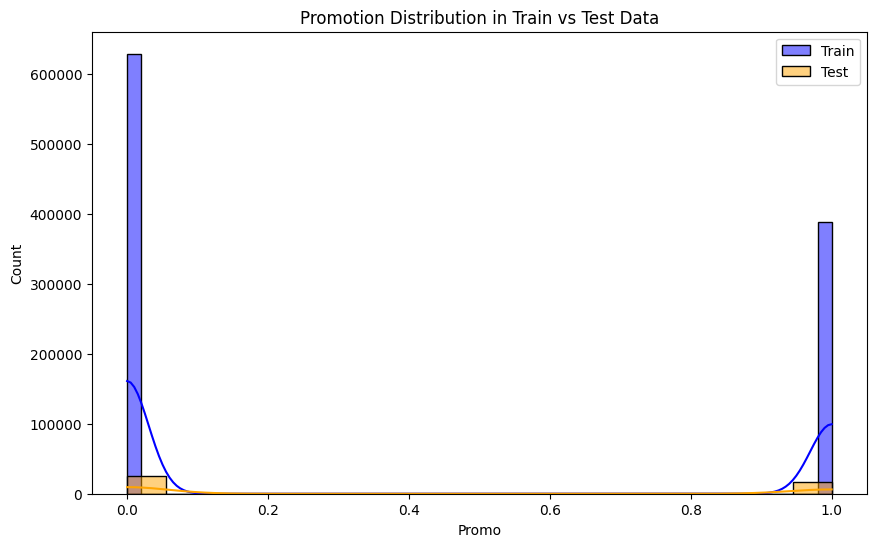

2025-01-03 20:58:43,295 - SalesVisualizer - INFO - Promotion distribution plot generated successfully.


In [10]:
#Check for distribution in both training and test sets
visualizer.compare_promo_distribution()


2025-01-03 20:58:43,314 - SalesVisualizer - INFO - Analyzing sales behavior before, during, and after holidays using a line plot with markers.


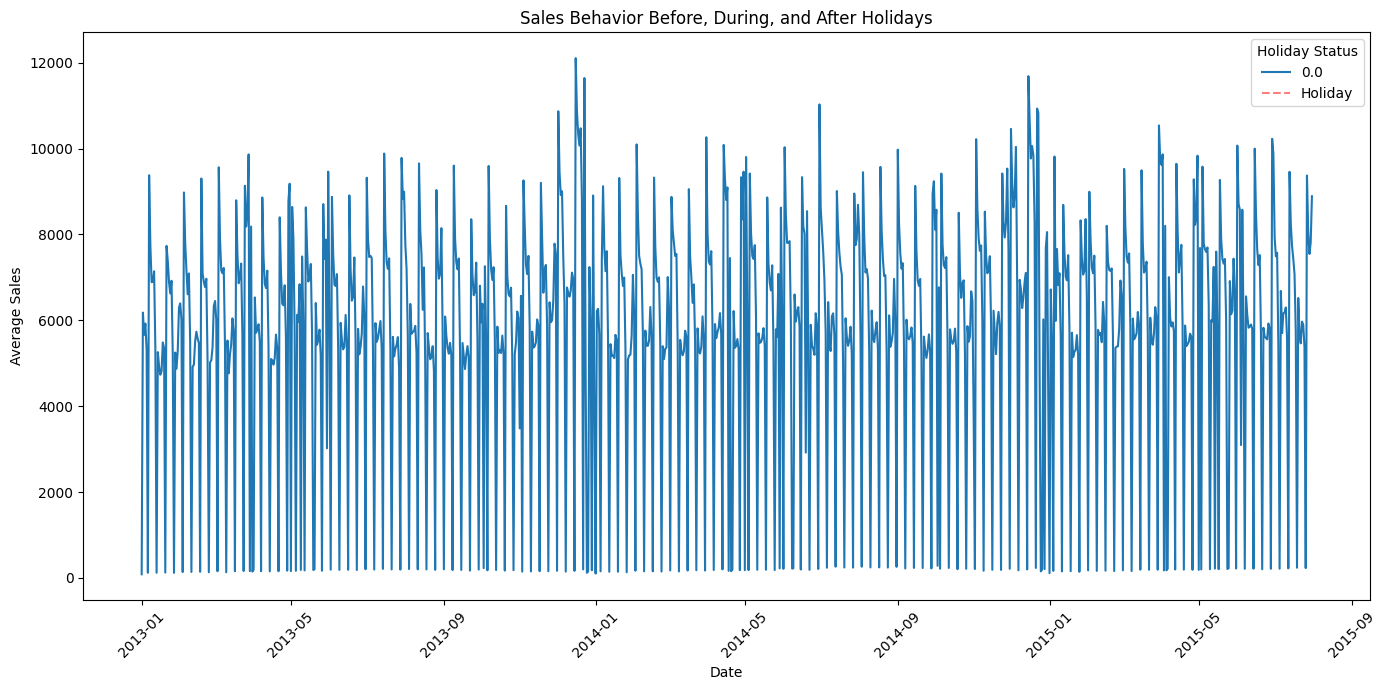

2025-01-03 20:58:44,032 - SalesVisualizer - INFO - Sales behavior during holidays plot generated successfully using line plot with markers.


In [11]:
visualizer.sales_during_holidays()


2025-01-03 20:55:09,331 - SalesVisualizer - INFO - Analyzing seasonal sales behavior.


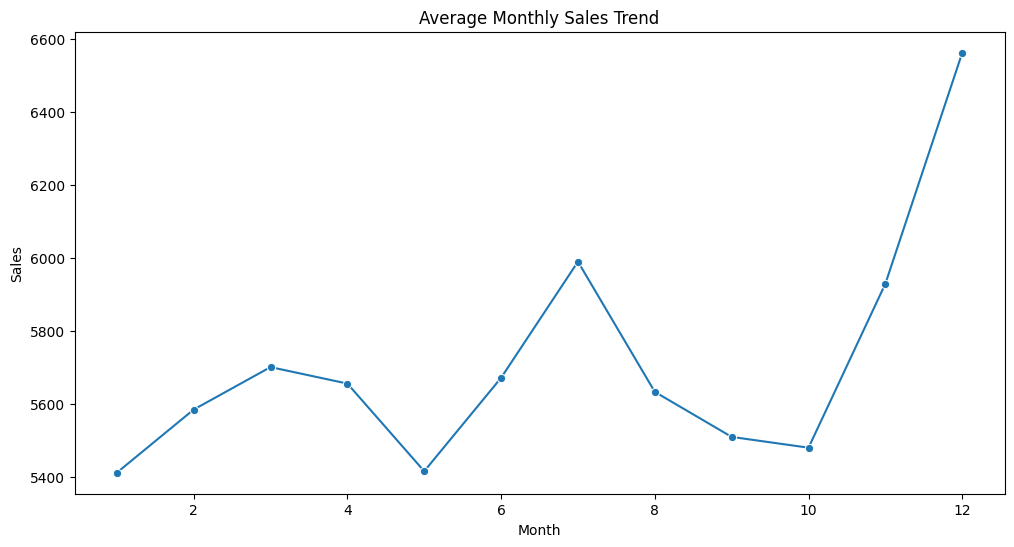

2025-01-03 20:55:09,688 - SalesVisualizer - INFO - Seasonal behavior plot generated successfully.


In [11]:
visualizer.seasonal_behavior()


2025-01-03 20:56:48,666 - SalesVisualizer - INFO - Analyzing correlation between sales and customers.


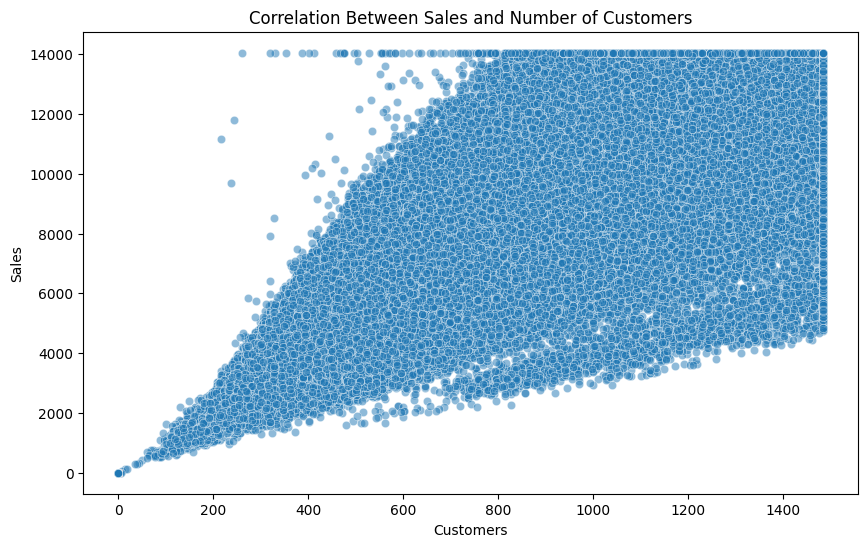

2025-01-03 20:56:52,641 - SalesVisualizer - INFO - Sales and customers correlation plot generated successfully.


In [15]:
visualizer.sales_customer_correlation()
